In [1]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#tp = plot_pc_graph_tikz(est_g, [String(k) for k in keys(df)])


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(Graphs.SimpleGraphs.SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.811812288, 0.025342525))

In [2]:
include("../src/equations.jl")

generate_data

In [3]:
est_g

{5, 7} directed simple Int64 graph

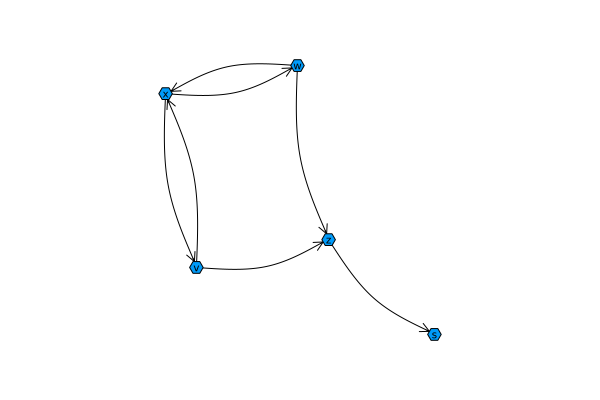

In [4]:
using Plots, GraphRecipes

graphplot(est_g, names= [String(k) for k in keys(df)])

In [5]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

df = (x=x, v=v, w=w, z=z, s=s)


(x = [0.06193274031408013, 0.2784058141640002, -0.5958244153640522, 0.04665938957338174, 1.0857940215432762, -1.5765649225859841, 0.1759399913010747, 0.8653808054093252, -2.790281005549307, -1.8920155582259128  …  -1.172869224619136, 0.9218177694319407, -0.46060170839179715, -0.9424506066689221, -0.6683350146660898, 1.13376245295865, 0.16017123470193892, 1.2035494780696616, -0.25218914788914293, 1.121665998910078], v = [-0.09250182220418984, 0.5675980897652538, -0.7140918730993022, -0.13985185939667483, 0.8654191143982632, -1.6179414873956435, 0.5908944698407181, 0.9484675082849228, -2.5323640793803697, -1.7979777572444016  …  -1.0046444212595644, 1.1717910105198648, -0.49022308208890647, -1.5455988844258108, -0.5526962435107993, 1.141418378235226, 0.8364713487518959, 1.1029217963545608, -0.5302228268986705, 1.1264197190628773], w = [0.36578689835494893, 0.8410329130812975, -0.8534652870632888, -0.2624374783168834, 0.8651710876085588, -1.3083709949188083, -0.07268315253075378, 1.250996

In [6]:
est_g, score = ges(df; penalty=1.0, parallel=true)


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


(SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]]), 14229.65446246768, (0.182659872, 9.5989e-5))

In [7]:
print(est_g)

SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]])

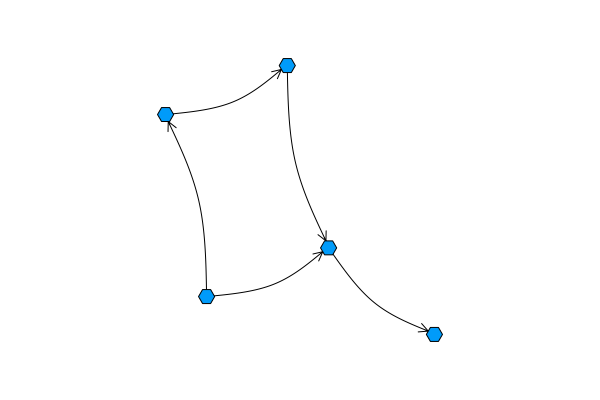

In [8]:
graphplot(pdag2dag!(est_g))

In [9]:
using Random
using CausalInference
using Graphs

# Set the random seed for reproducibility
Random.seed!(1)

# Number of samples
N = 2000

# Generate random variables
x = randn(N)
v = x + randn(N) * 0.25
w = x + randn(N) * 0.25
z = v + w + randn(N) * 0.25
s = z + randn(N) * 0.25

# Create a NamedTuple to represent the DataFrame
df = (x=x, v=v, w=w, z=z, s=s)

# Estimate the graph using GES
est_g, score = ges(df; penalty=1.0, parallel=true)

# Print the estimated graph
println("Estimated Graph:")
println(est_g)

# Extract the adjacency list
adj_list = collect(edges(est_g))

# Function to perform OLS regression
ols(X, y) = inv(X' * X) * X' * y

# Get the list of nodes and their names
nodes = collect(keys(df))

# Perform regressions based on the adjacency list
for node in nodes
    # Get the index of the node
    node_index = findfirst(==(node), nodes)
    
    # Get the parents of the node in the graph
    preds = [e.src for e in adj_list if e.dst == node_index]
    
    # If the node has predecessors, perform regression
    if !isempty(preds)
        # Create the design matrix X with only the parent variables
        X = hcat([df[nodes[pred]] for pred in preds]...)
        y = df[node]
        
        # Perform OLS regression
        coef = ols(X, y)
        
        # Print the coefficients (excluding the intercept)
        println("Coefficients for $node ~ ", join(["$(nodes[pred])" for pred in preds], " + "), ":")
        println(coef)
    end
end


Estimated Graph:
SimpleDiGraph{Int64}(7, [[2, 3], [1, 4], [1, 4], [5], Int64[]], [[2, 3], [1], [1], [2, 3], [4]])


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


Coefficients for x ~ v + w:
[0.4822865701211789, 0.47915204476827]
Coefficients for v ~ x:
[1.0077634660256916]
Coefficients for w ~ x:
[1.011743622979617]
Coefficients for z ~ v + w:
[0.9830732331777696, 1.005015339335607]
Coefficients for s ~ z:
[1.0051039852425676]


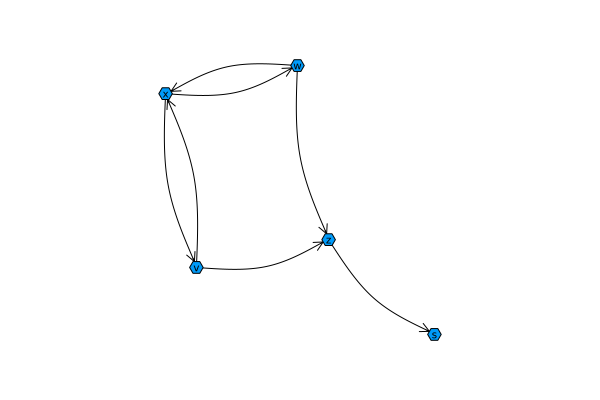

In [10]:
graphplot(est_g, names= [String(k) for k in keys(df)])

## With Actual Data

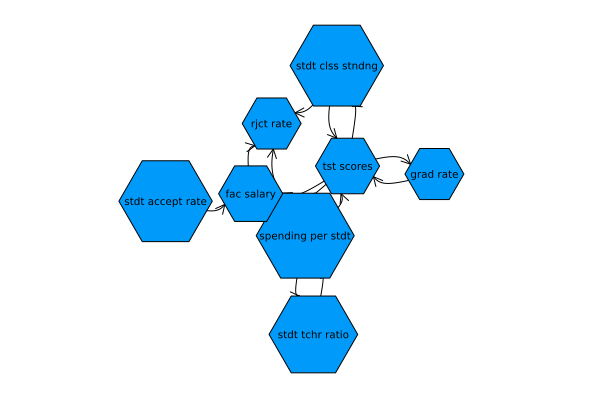

In [11]:
using HTTP, CSV, DataFrames
using CausalInference
using TikzGraphs
# If you have problems with TikzGraphs.jl, 
# try alternatively plotting backend GraphRecipes.jl + Plots.jl
# and corresponding plotting function `plot_pc_graph_recipes`

url = "https://www.ccd.pitt.edu//wp-content/uploads/files/Retention.txt"

df = DataFrame(CSV.File(HTTP.get(url).body))

# for now, pcalg and fcialg only accepts Float variables...
# this should change soon hopefully
for name in names(df)
	df[!, name] = convert(Array{Float64,1}, df[!,name])
end

# make variable names a bit easier to read
variables = map(x->replace(x,"_"=>" "), names(df))

est_g = pcalg(df, 0.025, gausscitest)

graphplot(est_g, names= variables)

In [12]:
ENV["LINES"] = 100
ENV["COLUMNS"] = 1000


1000

In [13]:
est_dag= pdag2dag!(est_g)

{8, 10} directed simple Int64 graph

In [14]:
display(estimate_equations(df,est_dag))

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[-26322.911573625835, 563.7103332918789], [56.72107647058824], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [49.044805680796244, 0.30181653964136346], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-498.7738413436855, -3209.0358410949593, -18.491173855803936, -4950.658299588922, 1865.205325957646, -3703.579048653719, 1059.7553677745855, -6225.48579927802, 1727.405493225404, 85.48815840758834  …  -2627.1738401908406, -908.9906041741742, -476.9906041741742, -837.0273821943229, 3306.665868334221, 2641.2847418549245, -3241.9772578963493, 2750.3932843894327, 1980.0536583454086, -2706.990604174174], [-4.221076470588237, 7.528923529411763, -18.971076470588237, 0.278923

In [15]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[-26322.911573625835, 563.7103332918789], [56.72107647058824], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [49.044805680796244, 0.30181653964136346], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-498.7738413436855, -3209.0358410949593, -18.491173855803936, -4950.658299588922, 1865.205325957646, -3703.579048653719, 1059.7553677745855, -6225.48579927802, 1727.405493225404, 85.48815840758834  …  -2627.1738401908406, -908.9906041741742, -476.9906041741742, -837.0273821943229, 3306.665868334221, 2641.2847418549245, -3241.9772578963493, 2750.3932843894327, 1980.0536583454086, -2706.990604174174], [-4.221076470588237, 7.528923529411763, -18.971076470588237, 0.278923

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [17]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[-26322.911573625835, 563.7103332918789], [56.72107647058824], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [49.044805680796244, 0.30181653964136346], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-498.7738413436855, -3209.0358410949593, -18.491173855803936, -4950.658299588922, 1865.205325957646, -3703.579048653719, 1059.7553677745855, -6225.48579927802, 1727.405493225404, 85.48815840758834  …  -2627.1738401908406, -908.9906041741742, -476.9906041741742, -837.0273821943229, 3306.665868334221, 2641.2847418549245, -3241.9772578963493, 2750.3932843894327, 1980.0536583454086, -2706.990604174174], [-4.221076470588237, 7.528923529411763, -18.971076470588237, 0.278923

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [18]:
simplecyclescount(est_g)

0

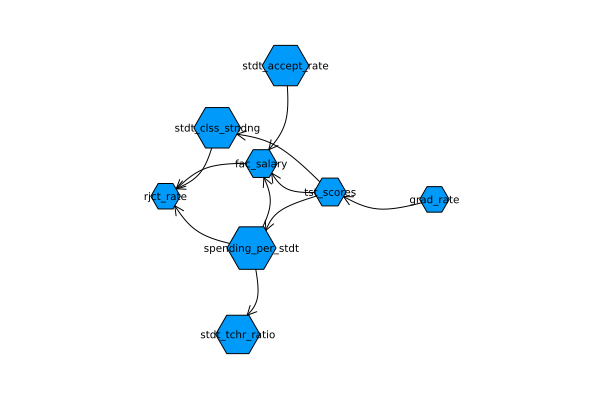

In [19]:
graphplot(est_g, names= names(df), nodesize=0.05)

In [20]:
display(estimate_equations(df,est_g))

SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[-26322.911573625835, 563.7103332918789], [56.72107647058824], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [49.044805680796244, 0.30181653964136346], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-498.7738413436855, -3209.0358410949593, -18.491173855803936, -4950.658299588922, 1865.205325957646, -3703.579048653719, 1059.7553677745855, -6225.48579927802, 1727.405493225404, 85.48815840758834  …  -2627.1738401908406, -908.9906041741742, -476.9906041741742, -837.0273821943229, 3306.665868334221, 2641.2847418549245, -3241.9772578963493, 2750.3932843894327, 1980.0536583454086, -2706.990604174174], [-4.221076470588237, 7.528923529411763, -18.971076470588237, 0.278923

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


In [21]:
scm= estimate_equations(df,est_g)

node: spending_per_stdt variables: String[]
node: grad_rate variables: ["spending_per_stdt"]
node: stdt_clss_stndng variables: ["spending_per_stdt", "grad_rate"]
node: rjct_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng"]
node: tst_scores variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate"]
node: stdt_accept_rate variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores"]
node: stdt_tchr_ratio variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate"]
node: fac_salary variables: ["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio"]


SCM(["spending_per_stdt", "grad_rate", "stdt_clss_stndng", "rjct_rate", "tst_scores", "stdt_accept_rate", "stdt_tchr_ratio", "fac_salary"], [[-26322.911573625835, 563.7103332918789], [56.72107647058824], [-138.89318757396273, 2.680484396527218], [-9.966300317856499, 0.0008018068799261275, 0.2450431342721079, 0.00036502391052588734], [49.044805680796244, 0.30181653964136346], [43.17310588235294], [20.57733533157175, -0.0004092086135238483], [22045.19780014377, 0.6340935060785277, 596.9824114475258, -165.50257006531936]], [[-498.7738413436855, -3209.0358410949593, -18.491173855803936, -4950.658299588922, 1865.205325957646, -3703.579048653719, 1059.7553677745855, -6225.48579927802, 1727.405493225404, 85.48815840758834  …  -2627.1738401908406, -908.9906041741742, -476.9906041741742, -837.0273821943229, 3306.665868334221, 2641.2847418549245, -3241.9772578963493, 2750.3932843894327, 1980.0536583454086, -2706.990604174174], [-4.221076470588237, 7.528923529411763, -18.971076470588237, 0.278923

### Testing cycles

In [45]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

# Create a DataFrame from the named tuple df
df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

#est_g= pdag2dag!(est_g)

estimate_equations(df, est_g)

┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


ArgumentError: ArgumentError: The provided graph is cyclic -> est_g::DiGraph should be a DAG.

In [46]:
using CausalInference
using TikzGraphs
using Random
Random.seed!(1)

# Generate some sample data to use with the GES algorithm

N = 2000 # number of data points

# define simple linear model with added noise
x = randn(N)
v = x + randn(N)*0.25
w = x + randn(N)*0.25
z = v + w + randn(N)*0.25
s = z + randn(N)*0.25

# Create a DataFrame from the named tuple df
df = (x=x, v=v, w=w, z=z, s=s)

est_g, score = ges(df; penalty=1.0, parallel=true)

est_g= pdag2dag!(est_g)

estimate_equations(df, est_g)


node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


┌ Warning: Only one thread available
└ @ CausalInference /home/jorge/.julia/packages/CausalInference/mIfRR/src/ges.jl:52


SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

In [25]:
is_cyclic(est_g)

false

### estimating equations scm

In [26]:
display(estimate_equations(df, est_g))

SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


In [27]:
scm = estimate_equations(df, est_g)

node: x variables: String[]
node: v variables: ["x"]
node: w variables: ["x", "v"]
node: z variables: ["x", "v", "w"]
node: s variables: ["x", "v", "w", "z"]


SCM(["x", "v", "w", "z", "s"], [[0.0022317898563466937, 0.9367119603785182], [0.024585909228746365], [0.003550972313918091, 1.0116592733213963], [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185], [-0.006432383444600807, 1.0051717688932633]], [[0.14634851367320525, -0.2555018950634595, 0.07084219312081663, 0.17542850909507524, 0.2729137964898912, -0.06325157000622195, -0.37978971577659626, -0.025291843487920018, -0.42041707421712626, -0.21006007837688445  …  -0.23403856915409404, -0.1780446750423934, -0.0036356740018450018, 0.5030985644640834, -0.1528496227695928, 0.0623504164135158, -0.6255932720442593, 0.16819765020583755, 0.24224512587620373, 0.06430338580132378], [-0.11708773143293622, 0.5430121805365075, -0.7386777823280486, -0.1644377686254212, 0.8408332051695169, -1.6425273966243898, 0.5663085606119718, 0.9238815990561764, -2.556949988609116, -1.822563666473148  …  -1.0292303304883108, 1.1472051012911184, -0.5148089913176528, -1.5701847936545572, -0.5772821527395456

In [28]:
scm.variables

5-element Vector{String}:
 "x"
 "v"
 "w"
 "z"
 "s"

In [29]:
scm.coefficients

5-element Vector{Vector{Float64}}:
 [0.0022317898563466937, 0.9367119603785182]
 [0.024585909228746365]
 [0.003550972313918091, 1.0116592733213963]
 [-0.006232926424238643, 0.9829313238887147, 1.0053061713146185]
 [-0.006432383444600807, 1.0051717688932633]

In [49]:
df=DataFrame(df)

Row,x,v,w,z,s
,Float64,Float64,Float64,Float64,Float64
1,0.0619327,-0.0925018,0.365787,0.00585492,-0.330166
2,0.278406,0.567598,0.841033,1.90745,2.08259
3,-0.595824,-0.714092,-0.853465,-1.66625,-2.00072
4,0.0466594,-0.139852,-0.262437,-0.724986,-0.864001
5,1.08579,0.865419,0.865171,1.2846,1.03755
6,-1.57656,-1.61794,-1.30837,-2.96285,-2.61467
7,0.17594,0.590894,-0.0726832,0.484619,0.490356
8,0.865381,0.948468,1.251,2.22934,2.23827
9,-2.79028,-2.53236,-2.60523,-5.07867,-5.04167


In [35]:
df_generated= generate_data(scm, 2000)


Row,v,x,w,z,s
,Float64,Float64,Float64,Float64,Float64
1,-0.302698,0.2374,0.670827,0.196464,0.130397
2,0.426044,0.372021,0.242548,0.317199,0.0962972
3,-1.29338,-1.65597,-1.59169,-3.08183,-3.21364
4,1.44404,1.32357,1.36186,2.78231,2.57944
5,-2.3398,-2.06814,-2.16922,-4.79378,-4.57694
6,1.08779,0.780596,1.14047,2.38907,2.26284
7,-0.723671,-0.775923,-0.837749,-1.53853,-1.16168
8,-0.631434,-0.807994,-0.670844,-1.46275,-0.981062
9,-0.114735,0.166291,0.243851,0.569801,0.0833307


In [37]:
mean(df_generated[!,"v"])

0.019578101822730884

In [40]:
mean(df[!,"v"])

0.024585909228746365

In [41]:
std(df_generated[!,"v"])

1.068897904387632

In [42]:
std(df[!,"v"])

1.0696022470495525

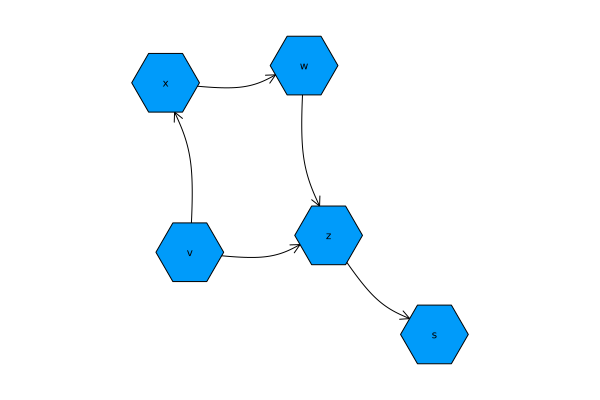

In [51]:
graphplot(scm.dag,  names= names(df), nodesize=0.5)

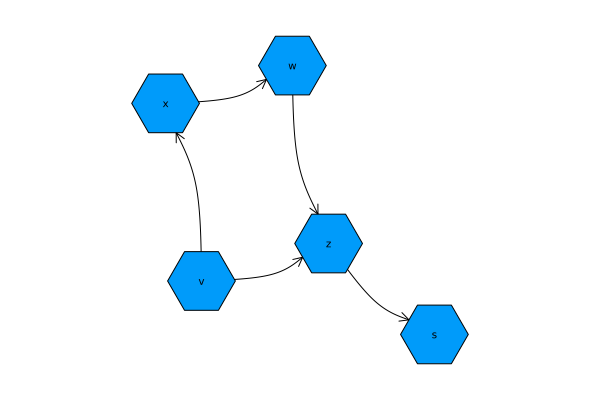

In [52]:
graphplot(est_g,  names= names(df), nodesize=0.5)